In [7]:
import numpy as np
from skimage.measure import points_in_poly
import json
from pprint import pprint
from skimage.measure import points_in_poly
import matplotlib.pyplot as plt
#
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
watershed_file = "watershed_comets.json"
manual_file = "manual_comets.json"
#manual_file = "MANUAL.json"

#
with open(watershed_file, 'r') as infile:
    watershed_json = json.load(infile)
    
with open(manual_file, 'r') as infile:
    manual_json = json.load(infile)
#
def get_masks(json_file, watershed=False):
    """
    This function takes a json file and produces masks from the x/y points defined within it.
    Each mask is of dimensions (nRows, nCols), found from using the 'filename' key to read in 
    the filename and find it's dimensions
    It returns the masks in a single array of dimensions (nRows, nCols, nRegions), where nRegions 
    is the number of x/y coords sets.
    """
    for i in json_file.keys():
        print("i is: ", i)
        dict_name = i
        for j in json_file[i].keys():
            print("j is: ", j)
    nRegions = len(json_file[dict_name]['regions'])
    nImages = len(json_file)
    print("length of dictionary is: ", len(json_file))

    print("dict_name is: ", dict_name)
    print("fileName is: ", json_file[dict_name]['filename'])
    imFile = json_file[dict_name]['filename']
    imPath = imFile = "../CometImages/exp-val/comets62.bmp"
    imgRaw = plt.imread(imPath)
    #print("image shape is: ", imgRaw.shape)
    nRows, nCols = imgRaw.shape[0], imgRaw.shape[1]

    #           
    mask = np.zeros((nRows, nCols, nRegions))
    #
    rows = np.linspace(0, nRows, nRows)
    cols = np.linspace(0, nCols, nCols)
    cMesh, rMesh = np.meshgrid(cols, rows)
    #
    cFlat = cMesh.flatten()
    rFlat = rMesh.flatten()
    nPix = len(cFlat)
    imgPixels = np.zeros((nPix, 2))
    imgPixels[:, 0] = cFlat
    imgPixels[:, 1] = rFlat
    comPix = 0
    bkgPix = 0
    #           
    watershed_masks = np.zeros((nRows, nCols, nRegions))
    for n in range(0, nRegions):
        if watershed == True:
            x_points = json_file[dict_name]['regions'][str(n)]['shape_attributes']['all_points_x']
            y_points = json_file[dict_name]['regions'][str(n)]['shape_attributes']['all_points_y']
        else:
            x_points = json_file[dict_name]['regions'][n]['shape_attributes']['all_points_x']
            y_points = json_file[dict_name]['regions'][n]['shape_attributes']['all_points_y']
        
        points = len(x_points)
        print("number of x and y points are: ", points)
        polygon = np.zeros((points, 2))
        #print("shape of polygon is: ", polygon.shape)
        polygon[:, 0] = x_points
        polygon[:, 1] = y_points
        thisMask = points_in_poly(imgPixels, polygon)
        #print("shape of thisMask: ", thisMask.shape)
        thisMask = np.reshape(thisMask, (nRows, nCols))
        #print("shape of thisMask after reshape is: ", thisMask.shape)
        mask[:, :, n] = thisMask
    
    return(mask, nRegions)

wMasks, nRegionsW = get_masks(watershed_json, watershed=True)
mMasks, nRegionsM = get_masks(manual_json, watershed=False)
print("number of regions in wMasks and mMasks is the same: ", nRegionsW == nRegionsM)

#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))   

Date and time  2021-11-12 11:39:57.808641
i is:  comets62.bmp1448758
j is:  base64_img_data
j is:  file_attributes
j is:  regions
j is:  filename
j is:  fileref
j is:  size
length of dictionary is:  1
dict_name is:  comets62.bmp1448758
fileName is:  ../CometImages/exp-val/comets62.bmp
number of x and y points are:  467
number of x and y points are:  445
number of x and y points are:  413
number of x and y points are:  465
number of x and y points are:  485
number of x and y points are:  439
number of x and y points are:  443
i is:  comets62.bmp1448758
j is:  file_attributes
j is:  size
j is:  filename
j is:  regions
length of dictionary is:  1
dict_name is:  comets62.bmp1448758
fileName is:  comets62.bmp
number of x and y points are:  18
number of x and y points are:  18
number of x and y points are:  21
number of x and y points are:  19
number of x and y points are:  16
number of x and y points are:  18
number of x and y points are:  21
number of regions in wMasks and mMasks is the sa

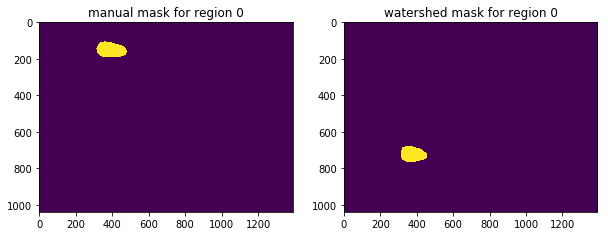

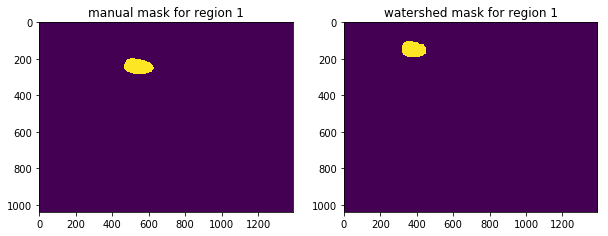

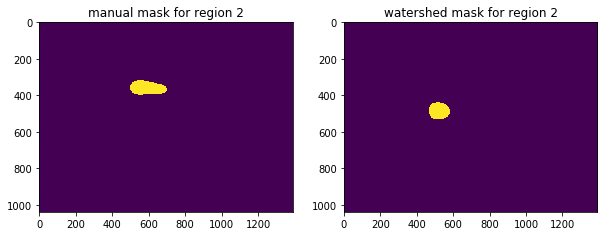

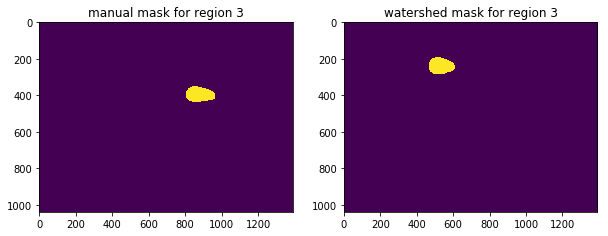

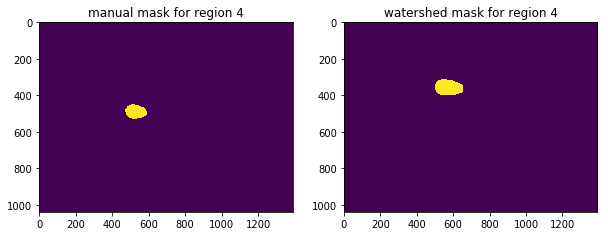

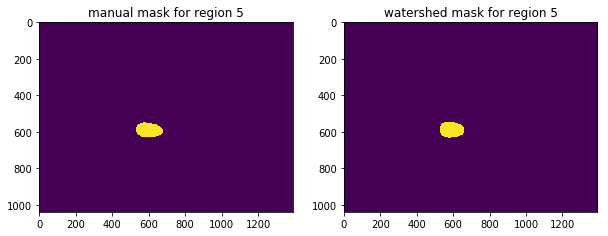

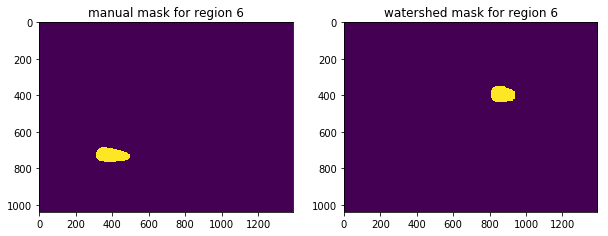

[376. 723.]
[380. 149.]
[520. 486.]
[530. 240.]
[571. 358.]
[589. 588.]
[867. 395.]


In [26]:
for n in range(0, nRegionsM):
    fig = plt.figure(figsize=(10,12))
    fig.add_subplot(1, 2, 1)
    plt.title("manual mask for region " + str(n))
    plt.imshow(mMasks[:,:,n])
    fig.add_subplot(1, 2, 2)
    plt.title("watershed mask for region " + str(n))
    plt.imshow(wMasks[:,:,n])
    plt.show()
    
wMaskAvgs = np.zeros((nRegionsM, 2))
for n in range(0, nRegionsM):
    yMask, xMask = np.where(wMasks[:, :, n] == 1)
    xAvg = np.average(xMask).astype(int)
    yAvg = np.average(yMask).astype(int)
    wMaskAvgs[n, 0] = xAvg
    wMaskAvgs[n, 1] = yAvg
    print(wMaskAvgs[n,:])
#print("wMaskAvgs is: ", wMaskAvgs)



### Need to reorder one of the mask arrays to match up to the regions of the other.
### Chosen to use the order of watershed and rearrange the manual to match it
### Using the average mask pixel from the watershed masks and check if they're in the old manual region at that same index. If not, continue to next manual mask. If it is, save that mask to the same position as in the watershed masks in teh new manual masks array.

7
avg Pixels (Y, X) are:  723 376
avg pix IS NOT oldMmasks index  0
avg pix IS NOT oldMmasks index  1
avg pix IS NOT oldMmasks index  2
avg pix IS NOT oldMmasks index  3
avg pix IS NOT oldMmasks index  4
avg pix IS NOT oldMmasks index  5
avg pix IS IN oldMmasks index  6
avg Pixels (Y, X) are:  149 380
avg pix IS IN oldMmasks index  0
avg Pixels (Y, X) are:  486 520
avg pix IS NOT oldMmasks index  0
avg pix IS NOT oldMmasks index  1
avg pix IS NOT oldMmasks index  2
avg pix IS NOT oldMmasks index  3
avg pix IS IN oldMmasks index  4
avg Pixels (Y, X) are:  240 530
avg pix IS NOT oldMmasks index  0
avg pix IS IN oldMmasks index  1
avg Pixels (Y, X) are:  358 571
avg pix IS NOT oldMmasks index  0
avg pix IS NOT oldMmasks index  1
avg pix IS IN oldMmasks index  2
avg Pixels (Y, X) are:  588 589
avg pix IS NOT oldMmasks index  0
avg pix IS NOT oldMmasks index  1
avg pix IS NOT oldMmasks index  2
avg pix IS NOT oldMmasks index  3
avg pix IS NOT oldMmasks index  4
avg pix IS IN oldMmasks index

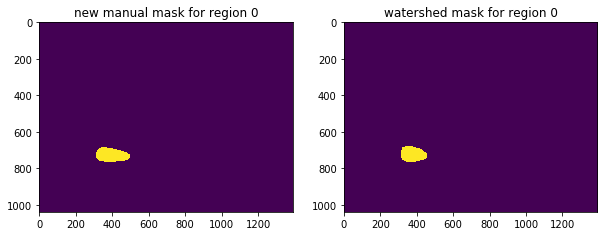

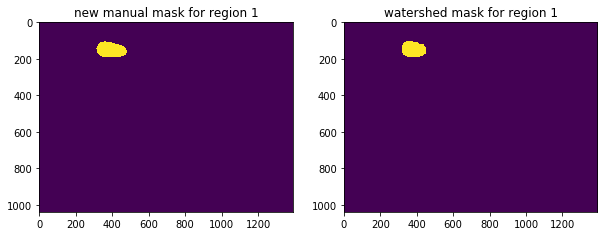

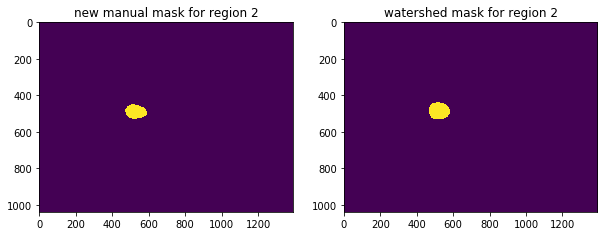

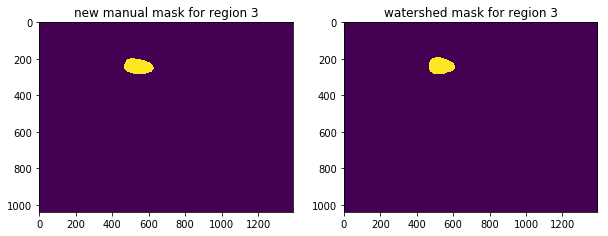

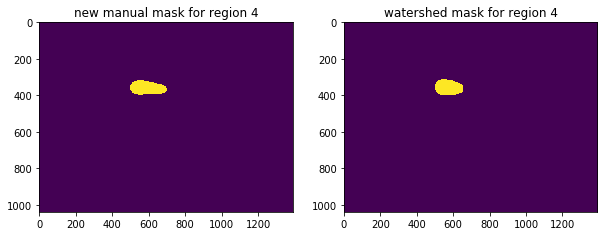

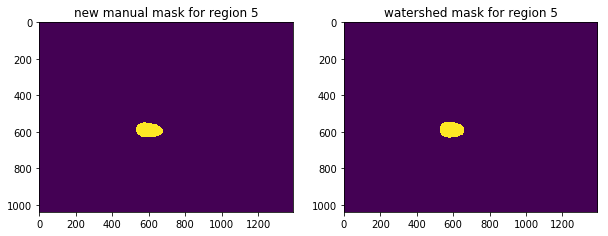

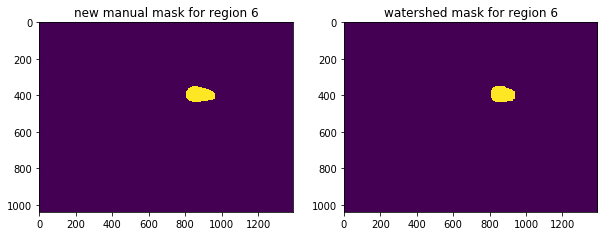

In [31]:
## Create new manual array to match up regions in equivalent indices of mask arrays for watershed masks and manual masks

oldMmasks = mMasks #define the current manual masks array as the old one
nRows, nCols = oldMmasks.shape[0], oldMmasks.shape[1]
newMmasks = np.zeros((nRows, nCols, nRegionsM))  #create a new manual masks array

print(nRegionsM)
for n in range (0, nRegionsM):
    avgPointX = wMaskAvgs[n, 0].astype(int)
    avgPointY = wMaskAvgs[n, 1].astype(int)  #get the x/y coords of teh avg mask point
    print("avg Pixels (Y, X) are: ", avgPointY, avgPointX)
    for i in range(0, nRegionsM):
        test = oldMmasks[avgPointY, avgPointX, i] # check if the avg pixle in old masks is 1/0 (in or not in)
        if test == 1:
            print("avg pix IS IN oldMmasks index ", i)
            newMmasks[:,:, n] = oldMmasks[:,:,i] #if avg point in mask region, assign to new manual masks at same index as watershed mask (n)
            break  #this region has been found so break this loop and go to next avg point check
        else:
            print("avg pix IS NOT oldMmasks index ", i)
            continue  #if avg point not in manual mask region, move to next oldMmask

for n in range(0, nRegionsM):
    fig = plt.figure(figsize=(10,12))
    fig.add_subplot(1, 2, 1)
    plt.title("new manual mask for region " + str(n))
    plt.imshow(newMmasks[:,:,n])
    fig.add_subplot(1, 2, 2)
    plt.title("watershed mask for region " + str(n))
    plt.imshow(wMasks[:,:,n])
    plt.show()   

In [44]:
import cv2
import numpy as np
#   
nMasks = wMasks.shape[2]
for n in range(0, nMasks):
    print("\nmask ", n)
    watershedPix = np.sum(wMasks[:,:, n])
    manualPix = np.sum(newMmasks[:,:, n])
    print("Number of pixels in watershed mask: ", watershedPix)
    print("Number of pixels in manual mask: ", manualPix)
    maskAND = cv2.bitwise_and(newMmasks[: , :, n], wMasks[:,:, n])
    print("maskAND (TRUE POSITIVE) sum is: ", np.sum(maskAND))
    maskXOR = cv2.bitwise_xor(newMmasks[: , :, n], wMasks[:,:, n])
    print("maskXOR sum is: ", np.sum(maskXOR))
    FP = np.sum(np.logical_and(wMasks[:,:, n], np.logical_not(newMmasks[:,:, n])))
    FN = np.sum(np.logical_and(newMmasks[:,:, n], np.logical_not(wMasks[:,:, n])))
    print("FP value is: ", FP)
    print("FN value is: ", FN)

    
n = 6
ws = wMasks[:,:, n]
manual = newMmasks[:,:, n]
yWS, xWS = np.where(ws==1)
print("yWS and xWS length are: ", len(yWS), len(xWS) )
lenX = np.max(xWS) - np.min(xWS)
lenY = np.max(yWS) - np.min(yWS)
print("length and height of mask are: ", lenX, lenY)



mask  0
Number of pixels in watershed mask:  10160.0
Number of pixels in manual mask:  11689.0
maskAND (TRUE POSITIVE) sum is:  9220.0
maskXOR sum is:  3409.0
FP value is:  940
FN value is:  2469

mask  1
Number of pixels in watershed mask:  9688.0
Number of pixels in manual mask:  11521.0
maskAND (TRUE POSITIVE) sum is:  9425.0
maskXOR sum is:  2359.0
FP value is:  263
FN value is:  2096

mask  2
Number of pixels in watershed mask:  8725.0
Number of pixels in manual mask:  7305.0
maskAND (TRUE POSITIVE) sum is:  6754.0
maskXOR sum is:  2522.0
FP value is:  1971
FN value is:  551

mask  3
Number of pixels in watershed mask:  10335.0
Number of pixels in manual mask:  10909.0
maskAND (TRUE POSITIVE) sum is:  9375.0
maskXOR sum is:  2494.0
FP value is:  960
FN value is:  1534

mask  4
Number of pixels in watershed mask:  11017.0
Number of pixels in manual mask:  12519.0
maskAND (TRUE POSITIVE) sum is:  10034.0
maskXOR sum is:  3468.0
FP value is:  983
FN value is:  2485

mask  5
Number o

In [ ]:
xMaxWS
xMinMan
xMasMan

In [14]:
pprint(manual_json)
#pprint(watershed_json)

{'comets62.bmp1448758': {'file_attributes': {'caption': '',
                                             'image_url': '',
                                             'public_domain': 'no'},
                         'filename': 'comets62.bmp',
                         'regions': [{'region_attributes': {},
                                      'shape_attributes': {'all_points_x': [320,
                                                                            327,
                                                                            343,
                                                                            360,
                                                                            398,
                                                                            421,
                                                                            453,
                                                                            475,
                                             